<a href="https://colab.research.google.com/github/laura-cheesmanhaynes/DSDA-Data-Visualisation/blob/main/BB_DataVis_week3%20(LCH).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Previous session's Google Colab:
https://colab.research.google.com/drive/1NevtJilm7h9-CvmZNuWtqyikK-aB_Ud2?usp=sharing

Loading a .ods file instructions as follows:

In [1]:
!pip install pandas odfpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 717.0/717.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for odfpy: filename=odfpy-1.4.1-py2.py3-none-any.whl size=160673 sha256=bd4a219a4178de61bb8407203b371931e1e43660eb6af95f10b460bfddcb4725
  Stored in directory: /root/.cache/pip/wheels/c8/2e/95/90d94fe33903786937f3b8c33dd88807f792359c6424b40469
Successfully built odfpy


In [2]:
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
# Loading .ods file into pandas data frame
import pandas as pd

#file_path = '/content/gdrive/My Drive/YSJ-DataVis/MY_ODS_FILE.ods'
file_path = '/content/gdrive/MyDrive/YSJ-DataVis/dvsa0201.ods'
#df = pd.read_excel(file_path, engine='odf') # Notice engine='odf'

In [8]:
# Loading specific sheets from .ods file into pandas data frame
sheet_name = '2022-23'  # Replace 'YourSheetName' with the actual name of your sheet
df_2223 = pd.read_excel(file_path, engine='odf', sheet_name=sheet_name)

In [ ]:
# Load All Sheets into a Dictionary of DataFrames
all_sheets_dict = pd.read_excel(file_path, engine='odf', sheet_name=None)


# **Classroom Group Exercise**

**Exercise**

Role: You are hired by the UK Driver and Vehicle Standards Agency (DVSA) to do some analysis on practical driving pass rates. You are provided the data on car pass rates by gender, month and test centre by DVSA. The data can be accessed from https://www.gov.uk/government/statistical-data-sets/car-driving-test-data-by-test-centre

The data (dvsa0201.ods) can also be accessed from: https://drive.google.com/file/d/1IkWGs6PBwRO9e_gGx-pC2-H88vYgAc3y/view?usp=sharing


Objectives (O):

Using the lessons learned in Data Visualisation so far,
- 1. Show the top 10 test centres with least pass rate in the latest year.
- 2. Show the top 10 test centres with most pass rate  in the latest year.
- 3. Show the pass rate for different genders in the top 10 test centres with least pass rate in the latest year.
- 4. Show the pass rate for different genders in the top 10 test centres with most pass rate in the latest year.
- 5. Which month period has the least pass rate for the top 10 test centres with least pass rate in the latest year.
- 6. Which month period has the most pass rate for the top 10 test centres with least pass rate in the latest year.
- 7. Which month preiod has the most pass rate for the top 10 test centres with most pass rate in the latest year.
- 8. Which month period has the least pass rate for the top 10 test centres with most pass rate in the latest year.

Discussion (D):

- 1. Mention any preprocessing done (how and why) on the data for the above objectives (O.1-8).
- 2. In your group, discuss what are the limitations of using matplotlib for the above data visualisation techniques?
- 3. Will using mplfinance be useful for this type of data? If yes, then why or if not, then why?
- 4. What other information/visuals you might want to show with the above visual representations (O.1-8)?

# Data Pre-Processing

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Loading .ods file into pandas data frame
file_path = '/content/gdrive/MyDrive/YSJ-DataVis/dvsa0201.ods'

# Loading specific sheets from .ods file into pandas data frame
sheet_name = '2022-23'  # Replace 'YourSheetName' with the actual name of your sheet
df_2223 = pd.read_excel(file_path, engine='odf', sheet_name=sheet_name)

In [23]:
# Accessing a specific DataFrame from the dictionary
#df_2223 = all_sheets_dict['2022-23']  # Replace 'Sheet1' with the actual name of your sheet
df_2223.head(15)

,"DVSA0201 Practical car pass rates by gender, month and DTC",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time Period Captured,April 2022 to March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Male tests,NaN,NaN,NaN,Female tests,NaN,NaN,NaN,Total tests,NaN,NaN
4,NaN,Conducted,Passes,Pass rate (%),NaN,Conducted,Passes,Pass rate (%),NaN,Conducted,Passes,Pass rate (%)
5,Aberdeen North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-04-05 00:00:00,146,67,45.890411,,155,71,45.806452,,301,138,45.847176
7,2022-05-03 00:00:00,154,79,51.298701,,172,77,44.767442,,326,156,47.852761
8,2022-06-24 00:00:00,176,87,49.431818,,147,77,52.380952,,323,164,50.773994
9,2022-07-02 00:00:00,87,46,52.873563,,101,55,54.455446,,189,102,53.968254


In [24]:
# remove the unneeded columns
columns_to_remove = [4, 8]
df_2223 = df_2223.drop(df_2223.columns[columns_to_remove], axis=1)
df_2223

,"DVSA0201 Practical car pass rates by gender, month and DTC",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Time Period Captured,April 2022 to March 2023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Male tests,NaN,NaN,Female tests,NaN,NaN,Total tests,NaN,NaN
4,NaN,Conducted,Passes,Pass rate (%),Conducted,Passes,Pass rate (%),Conducted,Passes,Pass rate (%)
...,...,...,...,...,...,...,...,...,...,...
4835,ZWhitchurch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4836,2022-04-01 00:00:00,..,..,60,..,..,41.666667,32,17,53.125
4837,ZWhitchurch,..,..,60,..,..,41.666667,32,17,53.125
4838,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# skip the first rows and the last row with national figures
df_2223 = df_2223[5:-2]
df_2223

,"DVSA0201 Practical car pass rates by gender, month and DTC",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 9,Unnamed: 10,Unnamed: 11
5,Aberdeen North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-04-05 00:00:00,146,67,45.890411,155,71,45.806452,301,138,45.847176
7,2022-05-03 00:00:00,154,79,51.298701,172,77,44.767442,326,156,47.852761
8,2022-06-24 00:00:00,176,87,49.431818,147,77,52.380952,323,164,50.773994
9,2022-07-02 00:00:00,87,46,52.873563,101,55,54.455446,189,102,53.968254
...,...,...,...,...,...,...,...,...,...,...
4833,ZSouthampton (Forest Hills),39,25,64.102564,70,36,51.428571,109,61,55.963303
4834,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4835,ZWhitchurch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4836,2022-04-01 00:00:00,..,..,60,..,..,41.666667,32,17,53.125


In [26]:
# update the column names
df_2223.columns = ['date', 'm_test', 'm_test_pass', 'm_test_pass_rate', 'f_test', 'f_test_pass', 'f_test_pass_rate', 'tot_test', 'tot_pass', 'tot_pass_rate']
df_2223

,date,m_test,m_test_pass,m_test_pass_rate,f_test,f_test_pass,f_test_pass_rate,tot_test,tot_pass,tot_pass_rate
5,Aberdeen North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-04-05 00:00:00,146,67,45.890411,155,71,45.806452,301,138,45.847176
7,2022-05-03 00:00:00,154,79,51.298701,172,77,44.767442,326,156,47.852761
8,2022-06-24 00:00:00,176,87,49.431818,147,77,52.380952,323,164,50.773994
9,2022-07-02 00:00:00,87,46,52.873563,101,55,54.455446,189,102,53.968254
...,...,...,...,...,...,...,...,...,...,...
4833,ZSouthampton (Forest Hills),39,25,64.102564,70,36,51.428571,109,61,55.963303
4834,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4835,ZWhitchurch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4836,2022-04-01 00:00:00,..,..,60,..,..,41.666667,32,17,53.125


In [27]:
# variable to store location
current_location = None

# Iterate through each row in the DataFrame
for index, row in df_2223.iterrows():
    # check if first column contains a string
    if isinstance(row['date'], str):
        #
        current_location = row['date']  # Update current location
    else:
        # contains a date, so give it the current location
        df_2223.at[index, 'location'] = current_location  # Assign current location to the 'location' column


df_2223


#Hint # Since the DataFrame is expected to have multi-level columns, you need to flatten these after loading the data
#df.columns = [' '.join(col).strip() for col in df.columns.values]

<ipython-input-27-072f562fbe8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2223.at[index, 'location'] = current_location  # Assign current location to the 'location' column


,date,m_test,m_test_pass,m_test_pass_rate,f_test,f_test_pass,f_test_pass_rate,tot_test,tot_pass,tot_pass_rate,location
5,Aberdeen North,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2022-04-05 00:00:00,146,67,45.890411,155,71,45.806452,301,138,45.847176,Aberdeen North
7,2022-05-03 00:00:00,154,79,51.298701,172,77,44.767442,326,156,47.852761,Aberdeen North
8,2022-06-24 00:00:00,176,87,49.431818,147,77,52.380952,323,164,50.773994,Aberdeen North
9,2022-07-02 00:00:00,87,46,52.873563,101,55,54.455446,189,102,53.968254,Aberdeen North
...,...,...,...,...,...,...,...,...,...,...,...
4833,ZSouthampton (Forest Hills),39,25,64.102564,70,36,51.428571,109,61,55.963303,NaN
4834,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4835,ZWhitchurch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4836,2022-04-01 00:00:00,..,..,60,..,..,41.666667,32,17,53.125,ZWhitchurch


In [28]:
# Drop rows where 'location' is NaN
# this removes the first row with the location name and the last row with the location summary
df_2223.dropna(subset=['location'], inplace=True)
df_2223

<ipython-input-28-1a569d43fa0e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2223.dropna(subset=['location'], inplace=True)


,date,m_test,m_test_pass,m_test_pass_rate,f_test,f_test_pass,f_test_pass_rate,tot_test,tot_pass,tot_pass_rate,location
6,2022-04-05 00:00:00,146,67,45.890411,155,71,45.806452,301,138,45.847176,Aberdeen North
7,2022-05-03 00:00:00,154,79,51.298701,172,77,44.767442,326,156,47.852761,Aberdeen North
8,2022-06-24 00:00:00,176,87,49.431818,147,77,52.380952,323,164,50.773994,Aberdeen North
9,2022-07-02 00:00:00,87,46,52.873563,101,55,54.455446,189,102,53.968254,Aberdeen North
10,2022-08-24 00:00:00,189,97,51.322751,172,73,42.44186,361,170,47.091413,Aberdeen North
...,...,...,...,...,...,...,...,...,...,...,...
4820,2022-04-04 00:00:00,90,49,54.444444,103,45,43.68932,193,94,48.704663,ZHigh Wycombe
4824,2022-04-04 00:00:00,38,25,65.789474,37,18,48.648649,75,43,57.333333,ZHyde (Manchester)
4828,2022-04-08 00:00:00,54,24,44.444444,64,35,54.6875,118,59,50,ZSouth Shields
4832,2022-04-07 00:00:00,39,25,64.102564,70,36,51.428571,109,61,55.963303,ZSouthampton (Forest Hills)


In [29]:
# reorder the columns
df_2223 = df_2223[['location', 'date',
                   'm_test', 'm_test_pass', 'm_test_pass_rate',
                   'f_test', 'f_test_pass', 'f_test_pass_rate',
                   'tot_test', 'tot_pass', 'tot_pass_rate']]
df_2223

,location,date,m_test,m_test_pass,m_test_pass_rate,f_test,f_test_pass,f_test_pass_rate,tot_test,tot_pass,tot_pass_rate
6,Aberdeen North,2022-04-05 00:00:00,146,67,45.890411,155,71,45.806452,301,138,45.847176
7,Aberdeen North,2022-05-03 00:00:00,154,79,51.298701,172,77,44.767442,326,156,47.852761
8,Aberdeen North,2022-06-24 00:00:00,176,87,49.431818,147,77,52.380952,323,164,50.773994
9,Aberdeen North,2022-07-02 00:00:00,87,46,52.873563,101,55,54.455446,189,102,53.968254
10,Aberdeen North,2022-08-24 00:00:00,189,97,51.322751,172,73,42.44186,361,170,47.091413
...,...,...,...,...,...,...,...,...,...,...,...
4820,ZHigh Wycombe,2022-04-04 00:00:00,90,49,54.444444,103,45,43.68932,193,94,48.704663
4824,ZHyde (Manchester),2022-04-04 00:00:00,38,25,65.789474,37,18,48.648649,75,43,57.333333
4828,ZSouth Shields,2022-04-08 00:00:00,54,24,44.444444,64,35,54.6875,118,59,50
4832,ZSouthampton (Forest Hills),2022-04-07 00:00:00,39,25,64.102564,70,36,51.428571,109,61,55.963303


In [30]:
# visually checking the document shows some cells contain ..
df_2223[df_2223['m_test']=='..']

,location,date,m_test,m_test_pass,m_test_pass_rate,f_test,f_test_pass,f_test_pass_rate,tot_test,tot_pass,tot_pass_rate
104,Alnwick,2022-12-02 00:00:00,..,..,46.153846,..,..,80,18,10,55.555556
105,Alnwick,2023-01-19 00:00:00,..,..,61.403509,..,..,56.097561,98,58,59.183673
113,Arbroath,2022-06-20 00:00:00,..,..,80,..,..,45.454545,21,13,61.904762
114,Arbroath,2022-07-21 00:00:00,..,..,71.428571,..,..,77.777778,16,12,75
119,Arbroath,2022-12-05 00:00:00,..,..,50,..,..,71.428571,13,8,61.538462
...,...,...,...,...,...,...,...,...,...,...,...
4634,Wick,2022-10-24 00:00:00,..,..,50,12,10,83.333333,22,15,68.181818
4637,Wick,2023-01-24 00:00:00,..,..,33.333333,..,..,78.571429,20,13,65
4638,Wick,2023-02-22 00:00:00,..,..,58.333333,..,..,44.444444,21,11,52.380952
4639,Wick,2023-03-29 00:00:00,..,..,47.368421,..,..,25,31,12,38.709677


In [31]:
# Replace '..' with zero
df_2223.replace('..', 0, inplace=True)

# Analysis

## Show the top 10 test centres with least pass rate in the latest year.

In [34]:
# calculate the pass rate for each test centre
df_2223_location = df_2223.groupby('location').agg({
    'm_test': 'sum',
    'm_test_pass': 'sum',
    'f_test': 'sum',
    'f_test_pass': 'sum',
    'tot_test': 'sum',
    'tot_pass': 'sum'
    })

# calculate the male pass rate
df_2223_location['m_pass_rate'] = df_2223_location['m_test_pass'] / df_2223_location['m_test'] * 100

# calculate the female pass rate
df_2223_location['f_pass_rate'] = df_2223_location['f_test_pass'] / df_2223_location['f_test'] * 100

# calculate the pass rate
df_2223_location['tot_pass_rate'] = df_2223_location['tot_pass'] / df_2223_location['tot_test'] * 100

# sort by pass rate
df_2223_location = df_2223_location.sort_values(by='tot_pass_rate', ascending=False)

# remove any with no tests
df_2223_location = df_2223_location[df_2223_location['tot_test']!=0]

# reorder columns
df_2223_location = df_2223_location[['m_test', 'm_test_pass', 'm_pass_rate', 'f_test', 'f_test_pass', 'f_pass_rate', 'tot_test', 'tot_pass', 'tot_pass_rate']]

In [35]:
# calculate average pass rate
average_pass_rate = df_2223_location['tot_pass_rate'].mean()

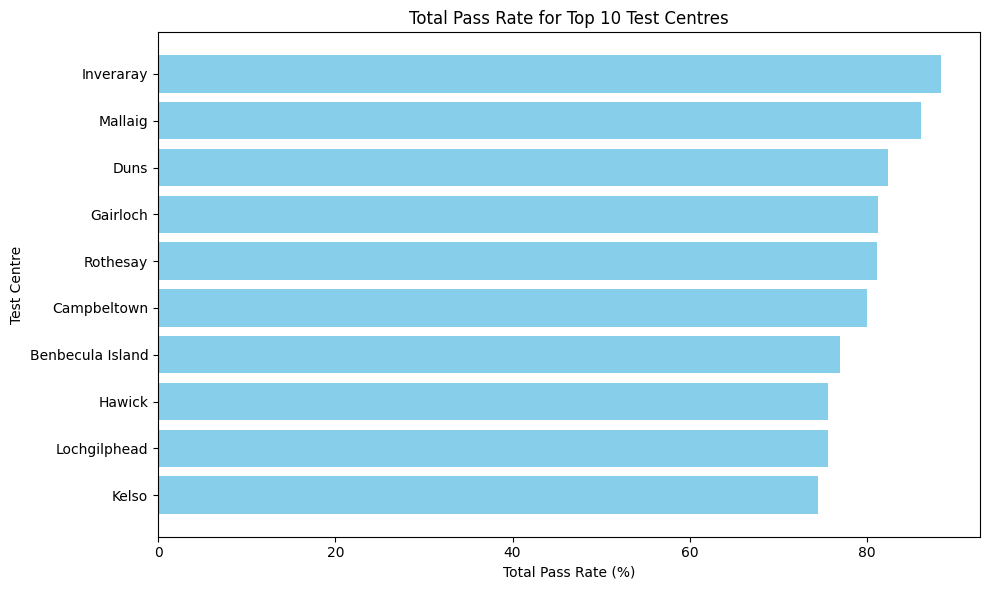

In [62]:
# show top 10
first_ten_records = df_2223_location.head(10)

# reverse the order so highest is at the top
first_ten_records = first_ten_records[::-1]

# Plotting the vertical bar chart
plt.figure(figsize=(10, 6))
plt.barh(first_ten_records.index, first_ten_records['tot_pass_rate'], color='skyblue')
plt.title('Total Pass Rate for Top 10 Test Centres')
plt.xlabel('Total Pass Rate (%)')
plt.ylabel('Test Centre')
plt.tight_layout()
plt.show()

* Show the top 10 test centres with least pass rate in the latest year.

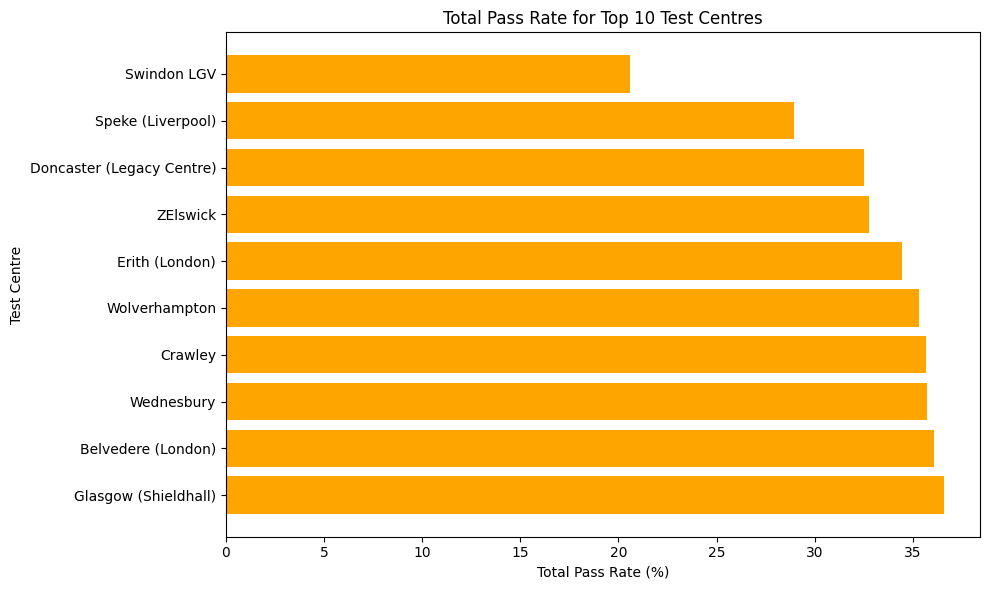

In [52]:
# show top 10
last_ten_records = df_2223_location.tail(10)

# reverse the order so highest is at the top
last_ten_records = last_ten_records.sort_values(by='tot_pass_rate', ascending=False)

# Display the result
#print(last_ten_records)

# Plotting the vertical bar chart
plt.figure(figsize=(10, 6))
plt.barh(last_ten_records.index, last_ten_records['tot_pass_rate'], color='orange')
plt.title('Total Pass Rate for Top 10 Test Centres')
plt.xlabel('Total Pass Rate (%)')
plt.ylabel('Test Centre')
plt.tight_layout()
#plt.gca().invert_yaxis()  # To show the lowest rate at the top
plt.show()



* Show the pass rate for different genders in the top 10 test centres with * least pass rate in the latest year.


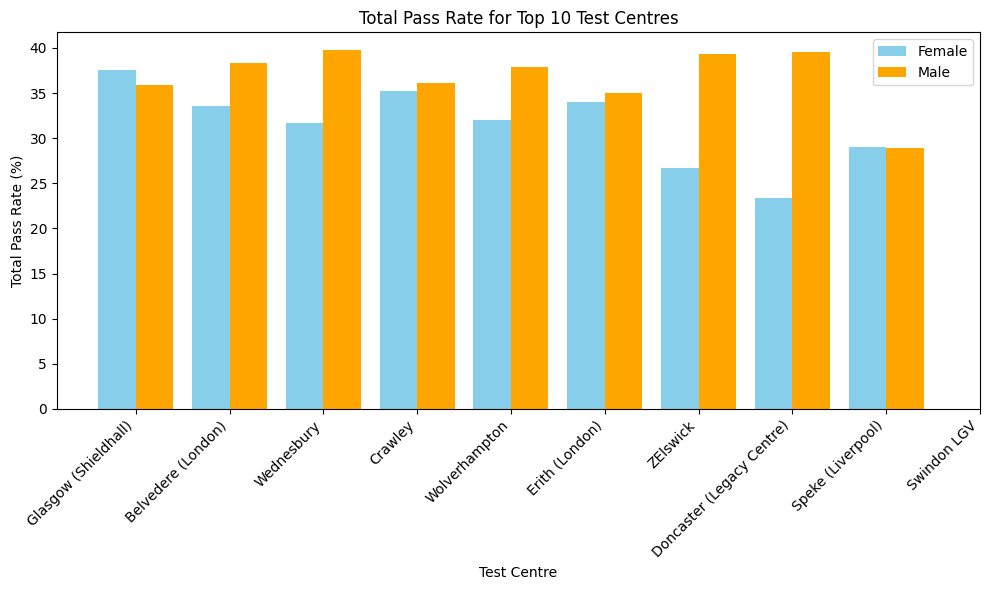

In [59]:
import numpy as np

# show top 10
last_ten_records = df_2223_location.tail(10)

# reverse the order so highest is at the top
last_ten_records = last_ten_records.sort_values(by='tot_pass_rate', ascending=False)

# Display the result
#print(last_ten_records)

# Plotting the vertical bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(last_ten_records))

plt.bar(index - bar_width/2, last_ten_records['f_pass_rate'], bar_width, label='Female', color='skyblue')
plt.bar(index + bar_width/2, last_ten_records['m_pass_rate'], bar_width, label='Male', color='orange')

plt.title('Total Pass Rate for Bottom 10 Test Centres')
plt.xlabel('Test Centre')
plt.ylabel('Total Pass Rate (%)')
plt.xticks(index, last_ten_records.index, rotation=45, ha='right')  # Set the test centre names as x-axis ticks
plt.legend()
plt.tight_layout()
plt.show()


* Show the pass rate for different genders in the top 10 test centres with most pass rate in the latest year.

                  m_test  m_test_pass  m_pass_rate  f_test  f_test_pass  \
location                                                                  
Kelso                 61           45    73.770492      77           54   
Lochgilphead           0            0          NaN       0            0   
Hawick               153          119    77.777778     172          128   
Benbecula Island       0            0          NaN       0            0   
Campbeltown            0            0          NaN       0            0   
Rothesay               0            0          NaN       0            0   
Gairloch               0            0          NaN       0            0   
Duns                   0            0          NaN       0            0   
Mallaig                0            0          NaN       0            0   
Inveraray              0            0          NaN       0            0   

                  f_pass_rate  tot_test  tot_pass  tot_pass_rate  
location                        

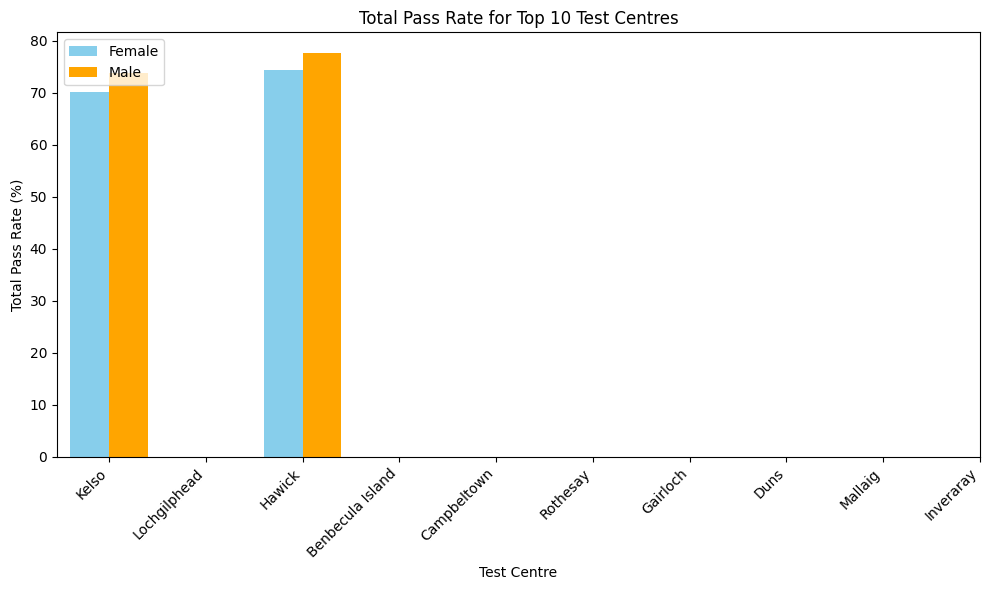

In [64]:
# Display the result
print(first_ten_records)

# Plotting the vertical bar chart
plt.figure(figsize=(10, 6))
bar_width = 0.4
index = np.arange(len(first_ten_records))

plt.bar(index - bar_width/2, first_ten_records['f_pass_rate'], bar_width, label='Female', color='skyblue')
plt.bar(index + bar_width/2, first_ten_records['m_pass_rate'], bar_width, label='Male', color='orange')

plt.title('Total Pass Rate for Top 10 Test Centres')
plt.xlabel('Test Centre')
plt.ylabel('Total Pass Rate (%)')
plt.xticks(index, first_ten_records.index, rotation=45, ha='right')  # Set the test centre names as x-axis ticks
plt.legend()
plt.tight_layout()
plt.show()


In [69]:
# Create a new column 'month' with the month of each date
df_2223['month'] = df_2223['date'].dt.month

# Display the updated DataFrame
print(df_2223)


                         location       date  m_test  m_test_pass  \
6                  Aberdeen North 2022-04-05     146           67   
7                  Aberdeen North 2022-05-03     154           79   
8                  Aberdeen North 2022-06-24     176           87   
9                  Aberdeen North 2022-07-02      87           46   
10                 Aberdeen North 2022-08-24     189           97   
...                           ...        ...     ...          ...   
4820                ZHigh Wycombe 2022-04-04      90           49   
4824           ZHyde (Manchester) 2022-04-04      38           25   
4828               ZSouth Shields 2022-04-08      54           24   
4832  ZSouthampton (Forest Hills) 2022-04-07      39           25   
4836                  ZWhitchurch 2022-04-01       0            0   

      m_test_pass_rate  f_test  f_test_pass  f_test_pass_rate  tot_test  \
6            45.890411     155           71         45.806452       301   
7            51.29870

* Which month period has the least pass rate for the top 10 test centres with least pass rate in the latest year.

In [73]:
# calculate the pass rate for each test centre
df_2223_month = df_2223.groupby('month').agg({
    'm_test': 'sum',
    'm_test_pass': 'sum',
    'f_test': 'sum',
    'f_test_pass': 'sum',
    'tot_test': 'sum',
    'tot_pass': 'sum'
    })

# calculate the male pass rate
df_2223_month['m_pass_rate'] = df_2223_month['m_test_pass'] / df_2223_month['m_test'] * 100

# calculate the female pass rate
df_2223_month['f_pass_rate'] = df_2223_month['f_test_pass'] / df_2223_month['f_test'] * 100

# calculate the pass rate
df_2223_month['tot_pass_rate'] = df_2223_month['tot_pass'] / df_2223_month['tot_test'] * 100

# sort by pass rate
#df_2223_month = df_2223_month.sort_values(by='tot_pass_rate', ascending=False)

# remove any with no tests
#df_2223_month = df_2223_month[df_2223_month['tot_test']!=0]

# reorder columns
df_2223_month = df_2223_month[['m_test', 'm_test_pass', 'm_pass_rate', 'f_test', 'f_test_pass', 'f_pass_rate', 'tot_test', 'tot_pass', 'tot_pass_rate']]


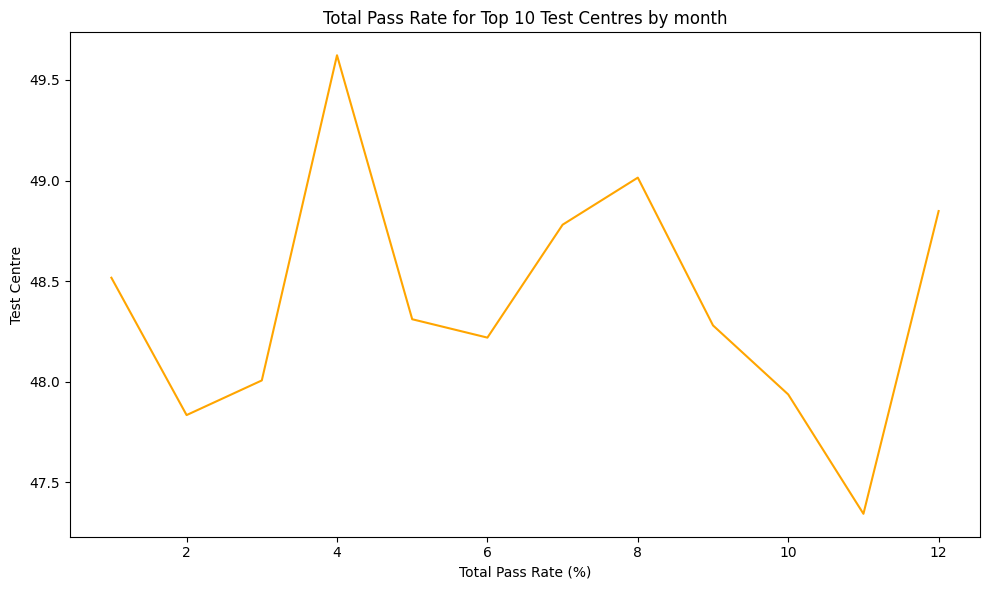

In [78]:
# show top 10
last_ten_records = df_2223_location.tail(10)

# Display the result
#print(last_ten_records)

# Plotting the vertical bar chart
plt.figure(figsize=(10, 6))
plt.plot(df_2223_month.index, df_2223_month['tot_pass_rate'], color='orange')
plt.title('Total Pass Rate for Top 10 Test Centres by month')
plt.xlabel('Total Pass Rate (%)')
plt.ylabel('Test Centre')
plt.tight_layout()
#plt.gca().invert_yaxis()  # To show the lowest rate at the top
plt.show()

In [70]:
df_2223.columns

Index(['location', 'date', 'm_test', 'm_test_pass', 'm_test_pass_rate',
       'f_test', 'f_test_pass', 'f_test_pass_rate', 'tot_test', 'tot_pass',
       'tot_pass_rate', 'month'],
      dtype='object')


* Which month period has the most pass rate for the top 10 test centres with least pass rate in the latest year.


* Which month preiod has the most pass rate for the top 10 test centres with most pass rate in the latest year.


* Which month period has the least pass rate for the top 10 test centres with most pass rate in the latest year.

# **Solution Hint**

In [ ]:
import matplotlib.pyplot as plt

# Clean and preprocess the DataFrame as necessary
# Assuming df is preprocessed and each row represents a test center's annual data

# Calculate the total pass rate for each test center if not already calculated
# df['Total Pass Rate'] = (df['Passes'] / df['Conducted']) * 100  # Modify this line according to your DataFrame structure

# Since the DataFrame is expected to have multi-level columns, you need to flatten these after loading the data
df.columns = [' '.join(col).strip() for col in df.columns.values]

# Find the Test Centers with the least total pass rate
# Sorting by the total tests pass rate column
least_pass_rates = df.sort_values(by='Total tests Pass rate (%)').head(10)

# Visualization using matplotlib
plt.figure(figsize=(10, 8))
plt.barh(least_pass_rates['Test Center Name'], least_pass_rates['Total tests Pass rate (%)'])  # You need to replace 'Test Center Name' with the actual name of your test center column
plt.xlabel('Pass Rate (%)')
plt.ylabel('Test Center')
plt.title('Top 10 Test Centers with Least Pass Rate for Total Tests')
plt.gca().invert_yaxis()  # To show the lowest rate at the top
plt.show()